In [1]:
import findspark

findspark.init()

import pyspark

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, transform

spark = SparkSession.builder.appName("SparkTutorial") \
    .master("yarn") \
    .config("spark.driver.host", "127.0.0.1") \
    .config("spark.driver.bindAddress", "127.0.0.1").getOrCreate()

spark.sparkContext.setLogLevel("WARN")

23/08/21 09:49:56 WARN Utils: Your hostname, SeongGils-MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 192.168.219.101 instead (on interface en0)
23/08/21 09:49:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/08/21 09:49:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/21 09:49:59 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [2]:
my_range = spark.range(1000).toDF("my_range")

23/08/20 11:37:44 INFO SharedState: Setting hive.metastore.warehouse.dir ('null') to the value of spark.sql.warehouse.dir.
23/08/20 11:37:44 INFO SharedState: Warehouse path is 'file:/Users/seonggil/Development/bigdata/spark-study/python-code/src/spark-warehouse'.
23/08/20 11:37:44 INFO ServerInfo: Adding filter to /SQL: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
23/08/20 11:37:44 INFO ServerInfo: Adding filter to /SQL/json: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
23/08/20 11:37:44 INFO ServerInfo: Adding filter to /SQL/execution: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
23/08/20 11:37:44 INFO ServerInfo: Adding filter to /SQL/execution/json: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
23/08/20 11:37:44 INFO ServerInfo: Adding filter to /static/sql: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter


In [7]:
my_range = my_range.withColumnRenamed("my_range", "number")

In [14]:
tmp = my_range.where("number > 0 and number %2 = 0")

In [15]:
tmp.count()

23/08/20 11:41:06 INFO CodeGenerator: Code generated in 111.525041 ms
23/08/20 11:41:06 INFO DAGScheduler: Registering RDD 19 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 0
23/08/20 11:41:06 INFO DAGScheduler: Got map stage job 4 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
23/08/20 11:41:06 INFO DAGScheduler: Final stage: ShuffleMapStage 4 (count at NativeMethodAccessorImpl.java:0)
23/08/20 11:41:06 INFO DAGScheduler: Parents of final stage: List()
23/08/20 11:41:06 INFO DAGScheduler: Missing parents: List()
23/08/20 11:41:06 INFO DAGScheduler: Submitting ShuffleMapStage 4 (MapPartitionsRDD[19] at count at NativeMethodAccessorImpl.java:0), which has no missing parents
23/08/20 11:41:06 INFO MemoryStore: Block broadcast_4 stored as values in memory (estimated size 14.9 KiB, free 434.3 MiB)
23/08/20 11:41:06 INFO MemoryStore: Block broadcast_4_piece0 stored as bytes in memory (estimated size 7.1 KiB, free 434.3 MiB)
23/08/20 11:41:06 INFO BlockMa

23/08/20 11:41:11 INFO TaskSetManager: Finished task 0.0 in stage 6.0 (TID 6) in 3751 ms on localhost (executor 2) (1/1)
23/08/20 11:41:11 INFO YarnScheduler: Removed TaskSet 6.0, whose tasks have all completed, from pool 
23/08/20 11:41:11 INFO DAGScheduler: ResultStage 6 (count at NativeMethodAccessorImpl.java:0) finished in 3.772 s
23/08/20 11:41:11 INFO DAGScheduler: Job 5 is finished. Cancelling potential speculative or zombie tasks for this job
23/08/20 11:41:11 INFO YarnScheduler: Killing all running tasks in stage 6: Stage finished
23/08/20 11:41:11 INFO DAGScheduler: Job 5 finished: count at NativeMethodAccessorImpl.java:0, took 3.797542 s


499

In [16]:
data = spark.read.csv("hdfs://localhost:9000/data/2015-summary.csv", header=True, inferSchema=True)
data.count()

23/08/20 11:42:00 INFO InMemoryFileIndex: It took 49 ms to list leaf files for 1 paths.
23/08/20 11:42:00 INFO InMemoryFileIndex: It took 9 ms to list leaf files for 1 paths.
23/08/20 11:42:00 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:42:00 INFO FileSourceStrategy: Post-Scan Filters: (length(trim(value#34, None)) > 0)
23/08/20 11:42:00 INFO FileSourceStrategy: Output Data Schema: struct<value: string>
23/08/20 11:42:00 INFO CodeGenerator: Code generated in 59.641084 ms
23/08/20 11:42:00 INFO MemoryStore: Block broadcast_6 stored as values in memory (estimated size 201.1 KiB, free 434.1 MiB)
23/08/20 11:42:00 INFO BlockManagerInfo: Removed broadcast_3_piece0 on 127.0.0.1:50841 in memory (size: 5.3 KiB, free: 434.4 MiB)
23/08/20 11:42:00 INFO MemoryStore: Block broadcast_6_piece0 stored as bytes in memory (estimated size 34.9 KiB, free 434.1 MiB)
23/08/20 11:42:00 INFO BlockManagerInfo: Added broadcast_6_piece0 in memory on 127.0.0.1:50841 (size: 34.9 KiB, free: 434.3 MiB)
23

23/08/20 11:42:02 INFO TaskSetManager: Finished task 0.0 in stage 7.0 (TID 7) in 1342 ms on localhost (executor 1) (1/1)
23/08/20 11:42:02 INFO YarnScheduler: Removed TaskSet 7.0, whose tasks have all completed, from pool 
23/08/20 11:42:02 INFO DAGScheduler: ResultStage 7 (csv at NativeMethodAccessorImpl.java:0) finished in 1.382 s
23/08/20 11:42:02 INFO DAGScheduler: Job 6 is finished. Cancelling potential speculative or zombie tasks for this job
23/08/20 11:42:02 INFO YarnScheduler: Killing all running tasks in stage 7: Stage finished
23/08/20 11:42:02 INFO DAGScheduler: Job 6 finished: csv at NativeMethodAccessorImpl.java:0, took 1.436708 s
23/08/20 11:42:02 INFO CodeGenerator: Code generated in 35.925541 ms
23/08/20 11:42:02 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:42:02 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:42:02 INFO FileSourceStrategy: Output Data Schema: struct<value: string>
23/08/20 11:42:02 INFO MemoryStore: Block broadcast_8 stored as values

23/08/20 11:42:02 INFO SparkContext: Starting job: csv at NativeMethodAccessorImpl.java:0
23/08/20 11:42:02 INFO DAGScheduler: Got job 7 (csv at NativeMethodAccessorImpl.java:0) with 1 output partitions
23/08/20 11:42:02 INFO DAGScheduler: Final stage: ResultStage 8 (csv at NativeMethodAccessorImpl.java:0)
23/08/20 11:42:02 INFO DAGScheduler: Parents of final stage: List()
23/08/20 11:42:02 INFO DAGScheduler: Missing parents: List()
23/08/20 11:42:02 INFO DAGScheduler: Submitting ResultStage 8 (MapPartitionsRDD[32] at csv at NativeMethodAccessorImpl.java:0), which has no missing parents
23/08/20 11:42:02 INFO MemoryStore: Block broadcast_9 stored as values in memory (estimated size 25.4 KiB, free 433.9 MiB)
23/08/20 11:42:02 INFO MemoryStore: Block broadcast_9_piece0 stored as bytes in memory (estimated size 11.9 KiB, free 433.9 MiB)
23/08/20 11:42:02 INFO BlockManagerInfo: Added broadcast_9_piece0 in memory on 127.0.0.1:50841 (size: 11.9 KiB, free: 434.3 MiB)
23/08/20 11:42:02 INFO Sp

23/08/20 11:42:04 INFO BlockManagerInfo: Added broadcast_8_piece0 in memory on localhost:50853 (size: 34.9 KiB, free: 434.4 MiB)
23/08/20 11:42:05 INFO TaskSetManager: Finished task 0.0 in stage 8.0 (TID 8) in 2931 ms on localhost (executor 2) (1/1)
23/08/20 11:42:05 INFO YarnScheduler: Removed TaskSet 8.0, whose tasks have all completed, from pool 
23/08/20 11:42:05 INFO DAGScheduler: ResultStage 8 (csv at NativeMethodAccessorImpl.java:0) finished in 2.990 s
23/08/20 11:42:05 INFO DAGScheduler: Job 7 is finished. Cancelling potential speculative or zombie tasks for this job
23/08/20 11:42:05 INFO YarnScheduler: Killing all running tasks in stage 8: Stage finished
23/08/20 11:42:05 INFO DAGScheduler: Job 7 finished: csv at NativeMethodAccessorImpl.java:0, took 3.005157 s
23/08/20 11:42:05 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:42:05 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:42:05 INFO FileSourceStrategy: Output Data Schema: struct<>
23/08/20 11:42:05 INFO 

23/08/20 11:42:05 INFO BlockManagerInfo: Added broadcast_11_piece0 in memory on 127.0.0.1:50841 (size: 8.1 KiB, free: 434.3 MiB)
23/08/20 11:42:05 INFO SparkContext: Created broadcast 11 from broadcast at DAGScheduler.scala:1513
23/08/20 11:42:05 INFO DAGScheduler: Submitting 1 missing tasks from ShuffleMapStage 9 (MapPartitionsRDD[36] at count at NativeMethodAccessorImpl.java:0) (first 15 tasks are for partitions Vector(0))
23/08/20 11:42:05 INFO YarnScheduler: Adding task set 9.0 with 1 tasks resource profile 0
23/08/20 11:42:05 INFO TaskSetManager: Starting task 0.0 in stage 9.0 (TID 9) (localhost, executor 1, partition 0, PROCESS_LOCAL, 4914 bytes) taskResourceAssignments Map()
23/08/20 11:42:05 INFO BlockManagerInfo: Added broadcast_11_piece0 in memory on localhost:50849 (size: 8.1 KiB, free: 434.4 MiB)
23/08/20 11:42:05 INFO BlockManagerInfo: Added broadcast_10_piece0 in memory on localhost:50849 (size: 34.9 KiB, free: 434.3 MiB)
23/08/20 11:42:06 INFO TaskSetManager: Finished ta

256

In [4]:
data.repartition(10)

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: int]

In [5]:
#Dataframe에서 csv파일을 읽어 로컬 배열이나 리스트 형태로 변환

data.take(3)

23/08/18 07:25:22 INFO FileSourceStrategy: Pushed Filters: 
23/08/18 07:25:22 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/18 07:25:22 INFO FileSourceStrategy: Output Data Schema: struct<DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: int ... 1 more fields>
23/08/18 07:25:22 INFO MemoryStore: Block broadcast_7 stored as values in memory (estimated size 201.0 KiB, free 433.4 MiB)
23/08/18 07:25:22 INFO MemoryStore: Block broadcast_7_piece0 stored as bytes in memory (estimated size 34.9 KiB, free 433.4 MiB)
23/08/18 07:25:22 INFO BlockManagerInfo: Added broadcast_7_piece0 in memory on 127.0.0.1:50387 (size: 34.9 KiB, free: 434.2 MiB)
23/08/18 07:25:22 INFO SparkContext: Created broadcast 7 from take at /var/folders/pv/tlww36x50mzbwkwxz5g2c0x40000gn/T/ipykernel_5554/3540522002.py:1
23/08/18 07:25:22 INFO FileSourceScanExec: Planning scan with bin packing, max size: 4194304 bytes, open cost is considered as scanning 4194304 bytes.
23/08/18 07:25:22 INFO SparkContext: S

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344)]

In [6]:
data.sort('count').explain()

23/08/18 07:25:41 INFO FileSourceStrategy: Pushed Filters: 
23/08/18 07:25:41 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/18 07:25:41 INFO FileSourceStrategy: Output Data Schema: struct<DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: int ... 1 more fields>
== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Sort [count#19 ASC NULLS FIRST], true, 0
   +- Exchange rangepartitioning(count#19 ASC NULLS FIRST, 200), ENSURE_REQUIREMENTS, [plan_id=63]
      +- FileScan csv [DEST_COUNTRY_NAME#17,ORIGIN_COUNTRY_NAME#18,count#19] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[hdfs://localhost:9000/data/2015-summary.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,ORIGIN_COUNTRY_NAME:string,count:int>


In [18]:
## Spark SQL : DataFrame -> add table or view and select
data.createOrReplaceTempView("flight_data_2015")

In [19]:
spark.sql('''
select dest_country_name, count(1)
from flight_data_2015
group by dest_country_name
''').explain()

## SPARK SQL, Dataframe 실행 계획은 동일

23/08/20 11:43:03 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:43:03 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:43:03 INFO FileSourceStrategy: Output Data Schema: struct<DEST_COUNTRY_NAME: string>
== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[dest_country_name#51], functions=[count(1)])
   +- Exchange hashpartitioning(dest_country_name#51, 200), ENSURE_REQUIREMENTS, [plan_id=153]
      +- HashAggregate(keys=[dest_country_name#51], functions=[partial_count(1)])
         +- FileScan csv [DEST_COUNTRY_NAME#51] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[hdfs://localhost:9000/data/2015-summary.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string>


In [24]:
spark.sql("""
    select max(t1.count) as max_count
    from flight_data_2015 as t1
""").take(1)

23/08/20 11:45:36 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:45:36 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:45:36 INFO FileSourceStrategy: Output Data Schema: struct<count: int>
23/08/20 11:45:36 INFO MemoryStore: Block broadcast_23 stored as values in memory (estimated size 201.0 KiB, free 432.4 MiB)
23/08/20 11:45:36 INFO MemoryStore: Block broadcast_23_piece0 stored as bytes in memory (estimated size 34.9 KiB, free 432.3 MiB)
23/08/20 11:45:36 INFO BlockManagerInfo: Added broadcast_23_piece0 in memory on 127.0.0.1:50841 (size: 34.9 KiB, free: 434.1 MiB)
23/08/20 11:45:36 INFO SparkContext: Created broadcast 23 from take at /var/folders/pv/tlww36x50mzbwkwxz5g2c0x40000gn/T/ipykernel_9620/784141438.py:1
23/08/20 11:45:36 INFO FileSourceScanExec: Planning scan with bin packing, max size: 4194304 bytes, open cost is considered as scanning 4194304 bytes.
23/08/20 11:45:36 INFO DAGScheduler: Registering RDD 63 (take at /var/folders/pv/tlww36x50mzbwkwxz5g2c0x40000

[Row(max_count=370002)]

In [26]:
from pyspark.sql import functions as f

data.select(f.max("count")).take(1)

23/08/20 11:46:32 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:46:32 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:46:32 INFO FileSourceStrategy: Output Data Schema: struct<count: int>
23/08/20 11:46:32 INFO MemoryStore: Block broadcast_28 stored as values in memory (estimated size 201.0 KiB, free 431.9 MiB)
23/08/20 11:46:32 INFO MemoryStore: Block broadcast_28_piece0 stored as bytes in memory (estimated size 34.9 KiB, free 431.8 MiB)
23/08/20 11:46:32 INFO BlockManagerInfo: Added broadcast_28_piece0 in memory on 127.0.0.1:50841 (size: 34.9 KiB, free: 434.0 MiB)
23/08/20 11:46:32 INFO SparkContext: Created broadcast 28 from take at /var/folders/pv/tlww36x50mzbwkwxz5g2c0x40000gn/T/ipykernel_9620/4170910463.py:2
23/08/20 11:46:32 INFO FileSourceScanExec: Planning scan with bin packing, max size: 4194304 bytes, open cost is considered as scanning 4194304 bytes.
23/08/20 11:46:32 INFO DAGScheduler: Registering RDD 73 (take at /var/folders/pv/tlww36x50mzbwkwxz5g2c0x4000

[Row(max(count)=370002)]

In [38]:
maxSql = spark.sql("""
                   select t1.dest_country_name, sum(t1.count) as destination_total
                   from flight_data_2015 as t1
                   group by t1.dest_country_name
                   order by sum(t1.count) desc
                   limit 5
                   """)

maxSql.explain()

23/08/20 11:53:39 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:53:39 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:53:39 INFO FileSourceStrategy: Output Data Schema: struct<DEST_COUNTRY_NAME: string, count: int>
== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- TakeOrderedAndProject(limit=5, orderBy=[destination_total#203L DESC NULLS LAST], output=[dest_country_name#51,destination_total#203L])
   +- HashAggregate(keys=[dest_country_name#51], functions=[sum(count#53)])
      +- Exchange hashpartitioning(dest_country_name#51, 200), ENSURE_REQUIREMENTS, [plan_id=515]
         +- HashAggregate(keys=[dest_country_name#51], functions=[partial_sum(count#53)])
            +- FileScan csv [DEST_COUNTRY_NAME#51,count#53] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[hdfs://localhost:9000/data/2015-summary.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,count:int>


In [37]:
data.groupBy("DEST_COUNTRY_NAME") \
    .sum("count") \
    .withColumnRenamed("sum(count)", "destination_total") \
    .sort(f.desc("destination_total")).limit(5) \
    .explain()

23/08/20 11:53:29 INFO FileSourceStrategy: Pushed Filters: 
23/08/20 11:53:29 INFO FileSourceStrategy: Post-Scan Filters: 
23/08/20 11:53:29 INFO FileSourceStrategy: Output Data Schema: struct<DEST_COUNTRY_NAME: string, count: int>
== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- TakeOrderedAndProject(limit=5, orderBy=[destination_total#198L DESC NULLS LAST], output=[DEST_COUNTRY_NAME#51,destination_total#198L])
   +- HashAggregate(keys=[DEST_COUNTRY_NAME#51], functions=[sum(count#53)])
      +- Exchange hashpartitioning(DEST_COUNTRY_NAME#51, 200), ENSURE_REQUIREMENTS, [plan_id=498]
         +- HashAggregate(keys=[DEST_COUNTRY_NAME#51], functions=[partial_sum(count#53)])
            +- FileScan csv [DEST_COUNTRY_NAME#51,count#53] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[hdfs://localhost:9000/data/2015-summary.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,count:int>


In [3]:
static_df = spark.read.format("csv").option("header", "true") \
    .option('inferSchema', 'true') \
    .load('hdfs://localhost:9000/data/by-day/*.csv')

In [4]:
static_df.repartition(10)
static_df.createOrReplaceTempView('retail_data')

In [5]:
static_schema = static_df.schema

In [6]:
static_schema

StructType([StructField('InvoiceNo', StringType(), True), StructField('StockCode', StringType(), True), StructField('Description', StringType(), True), StructField('Quantity', IntegerType(), True), StructField('InvoiceDate', TimestampType(), True), StructField('UnitPrice', DoubleType(), True), StructField('CustomerID', DoubleType(), True), StructField('Country', StringType(), True)])

In [107]:
from pyspark.sql import functions as f

spark.sparkContext.setLogLevel("ERROR")
static_df.selectExpr("CustomerID",
                     "(UnitPrice * Quantity) as total_cost",
                     "InvoiceDate"
                     ).groupBy(f.col("CustomerId"),
                               f.window(f.col('InvoiceDate'), "1 day")).sum("total_cost") \
    .where(f.col("CustomerID").isNotNull()) \
    .sort(f.desc("sum(total_cost)")) \
    .show()

+----------+--------------------+------------------+
|CustomerId|              window|   sum(total_cost)|
+----------+--------------------+------------------+
|   17450.0|{2011-09-20 09:00...|          71601.44|
|   18102.0|{2011-09-15 09:00...|31661.540000000005|
|   18102.0|{2011-10-21 09:00...|          29693.82|
|   14646.0|{2011-10-20 09:00...|28148.039999999994|
|   18102.0|{2010-12-07 09:00...|          25920.37|
|   12415.0|{2011-06-15 09:00...| 23426.81000000001|
|   15749.0|{2011-01-11 09:00...|           22998.4|
|   18102.0|{2011-10-03 09:00...|          22429.69|
|   12415.0|{2011-08-17 09:00...|21880.439999999995|
|   14646.0|{2011-08-11 09:00...| 19150.65999999999|
|   12931.0|{2011-08-04 09:00...|19045.480000000003|
|   17949.0|{2011-06-30 09:00...|18854.780000000002|
|   14646.0|{2011-02-21 09:00...|18279.479999999996|
|   14646.0|{2011-03-29 09:00...|           18247.5|
|   16684.0|{2011-10-05 09:00...|          18047.42|
|   14156.0|{2011-01-14 09:00...|16774.7199999

In [100]:
spark.sql("""
SELECT
  t1.CustomerId,
  window(t1.InvoiceDate, '1 day') AS window,
  SUM(t1.UnitPrice * t1.Quantity) AS total_cost
FROM
  retail_data as t1
  where t1.CustomerId is not null
GROUP BY CustomerId, window(InvoiceDate, '1 day')
order by total_cost desc
""").show()

+----------+--------------------+------------------+
|CustomerId|              window|        total_cost|
+----------+--------------------+------------------+
|   17450.0|{2011-09-20 09:00...|          71601.44|
|   18102.0|{2011-09-15 09:00...|31661.540000000005|
|   18102.0|{2011-10-21 09:00...|          29693.82|
|   14646.0|{2011-10-20 09:00...|28148.039999999994|
|   18102.0|{2010-12-07 09:00...|          25920.37|
|   12415.0|{2011-06-15 09:00...| 23426.81000000001|
|   15749.0|{2011-01-11 09:00...|           22998.4|
|   18102.0|{2011-10-03 09:00...|          22429.69|
|   12415.0|{2011-08-17 09:00...|21880.439999999995|
|   14646.0|{2011-08-11 09:00...| 19150.65999999999|
|   12931.0|{2011-08-04 09:00...|19045.480000000003|
|   17949.0|{2011-06-30 09:00...|18854.780000000002|
|   14646.0|{2011-02-21 09:00...|18279.479999999996|
|   14646.0|{2011-03-29 09:00...|           18247.5|
|   16684.0|{2011-10-05 09:00...|          18047.42|
|   14156.0|{2011-01-14 09:00...|16774.7199999

In [115]:
spark.sql("""
SELECT
  window(t1.InvoiceDate, '1 day') AS window,
  t1.CustomerId
FROM
  retail_data as t1
  where t1.CustomerId = '17450'
  group by CustomerId, window(t1.InvoiceDate, '1 day') 
""").show()

+--------------------+----------+
|              window|CustomerId|
+--------------------+----------+
|{2011-10-31 09:00...|   17450.0|
|{2011-11-29 09:00...|   17450.0|
|{2011-11-28 09:00...|   17450.0|
|{2011-09-21 09:00...|   17450.0|
|{2011-11-13 09:00...|   17450.0|
|{2011-05-24 09:00...|   17450.0|
|{2011-09-30 09:00...|   17450.0|
|{2011-07-14 09:00...|   17450.0|
|{2011-09-20 09:00...|   17450.0|
|{2011-06-21 09:00...|   17450.0|
|{2011-01-10 09:00...|   17450.0|
|{2011-06-16 09:00...|   17450.0|
|{2011-08-23 09:00...|   17450.0|
|{2011-01-11 09:00...|   17450.0|
|{2011-07-28 09:00...|   17450.0|
|{2011-03-09 09:00...|   17450.0|
|{2011-08-31 09:00...|   17450.0|
|{2011-05-31 09:00...|   17450.0|
|{2011-11-21 09:00...|   17450.0|
|{2010-12-07 09:00...|   17450.0|
+--------------------+----------+


In [119]:
###  Spark Stream ###

spark.sql("SELECT count(1) from retail_data").show()

+--------+
|count(1)|
+--------+
|  541909|
+--------+


In [141]:
## add 2011-12-10 on hdfs

spark.sql("""
    select * from retail_data as t1
    order by t1.InvoiceDate desc
    limit 5
""").show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+-------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+-------+
|   581587|    22556|PLASTERS IN TIN C...|      12|2011-12-09 12:50:00|     1.65|   12680.0| France|
|   581587|    22631|CIRCUS PARADE LUN...|      12|2011-12-09 12:50:00|     1.95|   12680.0| France|
|   581587|    22726|ALARM CLOCK BAKEL...|       4|2011-12-09 12:50:00|     3.75|   12680.0| France|
|   581587|    22555|PLASTERS IN TIN S...|      12|2011-12-09 12:50:00|     1.65|   12680.0| France|
|   581587|    22728|ALARM CLOCK BAKEL...|       4|2011-12-09 12:50:00|     3.75|   12680.0| France|
+---------+---------+--------------------+--------+-------------------+---------+----------+-------+


In [ ]:
## 스트리밍 Action

# 스트리밍 액션은 어딘가에 데이터를 채워 넣어야 하므로 일반적인 정적 액션과는 다른 특성을 가짐
# 본 예제에서 사용할 스트리밍 액션은 트리거가 실행된 다음 데이터를 갱신하게 될 인메모리 테이블에 데이터를 저장함
# 스파크는 이전 집계값보다 더 큰 값이 발생한 경우에만 인메모리 테이블을 갱신함
# 스트림이 시작되면 쿼리 실행 결과가 어떠한 형태로 인메모리 테이블에 기록되는지 확인 가능

In [3]:
static_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true") \
    .load("hdfs://localhost:9000/data/by-day/*.csv")

In [7]:
static_schema = static_df.schema

In [10]:
from pyspark.sql import functions as f

per_df = static_df.na.fill(0).withColumn("day_of_week", f.date_format(f.col("InvoiceDate"), "EEEE")) \
    .coalesce(5)  ## coalesce는 파티션 수를 줄이기만 가능

In [12]:
per_df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|day_of_week|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+
|   580538|    23084|  RABBIT NIGHT LIGHT|      48|2011-12-05 08:38:00|     1.79|   14075.0|United Kingdom|     Monday|
|   580538|    23077| DOUGHNUT LIP GLOSS |      20|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|     Monday|
|   580538|    22906|12 MESSAGE CARDS ...|      24|2011-12-05 08:38:00|     1.65|   14075.0|United Kingdom|     Monday|
|   580538|    21914|BLUE HARMONICA IN...|      24|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|     Monday|
|   580538|    22467|   GUMBALL COAT RACK|       6|2011-12-05 08:38:00|     2.55|   14075.0|United Kingdom|     Monday|
+---------+---------+-------------------

In [13]:
per_df.rdd.getNumPartitions()

5

In [15]:
per_df.select(f.col("InvoiceNo")).describe().show()

+-------+-----------------+
|summary|        InvoiceNo|
+-------+-----------------+
|  count|           541909|
|   mean| 559965.752026781|
| stddev|13428.41728079509|
|    min|           536365|
|    max|          C581569|
+-------+-----------------+


In [19]:
## split test / train

train_df = per_df.where(f.col("InvoiceNo") < "559965")
test_df = per_df.where(f.col("InvoiceNo") > "559965")

In [24]:
print(train_df.count() - test_df.count())

-24991


In [26]:
### 전처리
#StringIndexer로 각 요일을 수치형으로 변환
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer().setInputCol("day_of_week").setOutputCol("day_of_week_index") # Mon -> 2

In [28]:
#OneHotEncoder로 index -> binary vector로 변환
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder().setInputCol("day_of_week_index").setOutputCol("day_of_week_encoded")

In [29]:
from pyspark.ml.feature import VectorAssembler

vector_asb = VectorAssembler().setInputCols(['UnitPrice', 'Quantity', 'day_of_week_encoded']).setOutputCol('features')
# 스파크의 모든 머신러닝 알고리즘은 수치형 벡터 타입을 입력으로 사용

from pyspark.ml import Pipeline

trans_pipeline = Pipeline().setStages([indexer, encoder, vector_asb]) # pipeline -> indexer -> encoder -> vector_asb

In [31]:
fit_pipeline = trans_pipeline.fit(train_df)

In [33]:
trans_train = fit_pipeline.transform(train_df).cache()

In [39]:
trans_train.select("InvoiceNo", "day_of_week", "day_of_week_index", "day_of_week_encoded", "features").show(5)

# 모델의 하이퍼파라미터를 튜닝할 때, 캐싱을 사용하면 중간 변환된 데이터셋의 복사본을 메모리에 저장하므로 빠르게 반복적으로 수행 가능

+---------+-----------+-----------------+-------------------+--------------------+
|InvoiceNo|day_of_week|day_of_week_index|day_of_week_encoded|            features|
+---------+-----------+-----------------+-------------------+--------------------+
|   537226|     Monday|              2.0|      (5,[2],[1.0])|(7,[0,1,4],[2.95,...|
|   537226|     Monday|              2.0|      (5,[2],[1.0])|(7,[0,1,4],[2.1,8...|
|   537226|     Monday|              2.0|      (5,[2],[1.0])|(7,[0,1,4],[5.95,...|
|   537226|     Monday|              2.0|      (5,[2],[1.0])|(7,[0,1,4],[1.65,...|
|   537226|     Monday|              2.0|      (5,[2],[1.0])|(7,[0,1,4],[0.42,...|
+---------+-----------+-----------------+-------------------+--------------------+


In [40]:
from pyspark.ml.clustering import KMeans,KMeansModel

kmeans= KMeans().setK(10).setSeed(1)
model = kmeans.fit(trans_train)
model

KMeansModel: uid=KMeans_633452abd5c5, k=10, distanceMeasure=euclidean, numFeatures=7

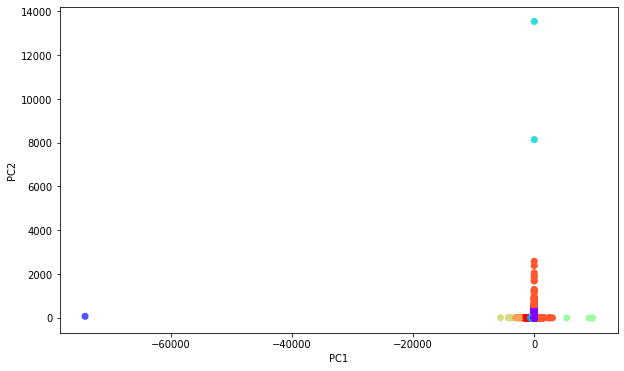

In [60]:
import matplotlib.pyplot  as plt
import seaborn as sns
from pyspark.ml.feature import PCA
import pandas as pd

transformed_data = model.transform(trans_train)

num_dimensions = 2  # You can also use 3 dimensions
pca = PCA(k=num_dimensions, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(transformed_data)
transformed_data = pca_model.transform(transformed_data)

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = transformed_data.select("pca_features", "prediction").toPandas()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["pca_features"].apply(lambda x: x[0]), pandas_df["pca_features"].apply(lambda x: x[1]), c=pandas_df["prediction"], cmap="rainbow")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

